# Logistic Regression

## using K-NN classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
path_to_file = "Data/"
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(np.shape(X), np.shape(y))
N_sample, N_feat = np.shape(X)
X_feat = list(dataset.columns.values)
print(X_feat)

(400, 2) (400,)
['Age', 'EstimatedSalary', 'Purchased']


## Split Data set into test and training set

We split the data set into training and test sets using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from Scikit-learn.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
print(X_train)
print()
print(X_test)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [5]:
print(y_train)
print(y_test)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


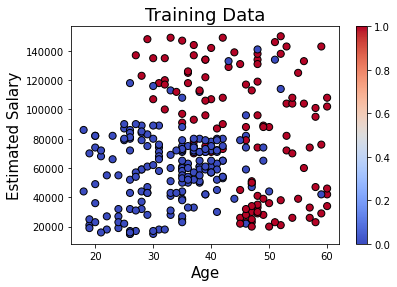

In [6]:

# Plotting the surface
x1 = X_train[:,0]
x2 = X_train[:,1]
# xi, yi = np.meshgrid(x1, x2)

# # Interpolate the y values on the grid.
# zi = griddata((x1, x2), y_train, (xi, yi), method='cubic')

# # Plotting the filled contour plot
# plt.figure(figsize=(8, 6))
# contour = plt.contourf(xi, yi, zi, levels=14, cmap='coolwarm')

plt.scatter(x1, x2, c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=50)
plt.colorbar()
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Estimated Salary', fontsize = 15)
plt.title("Training Data", fontsize = 18)
# Showing the plot
plt.show()

## Feature Scaling

Note we use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) which scales the features in the following ways: 

$$
x_{\text{scaled}} = \frac{x_{\text{org}} - \langle x_{\text{org}} \rangle }{\text{STD}(x_{\text{org}})}
$$

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X_train)
X1_test = sc.transform(X_test)

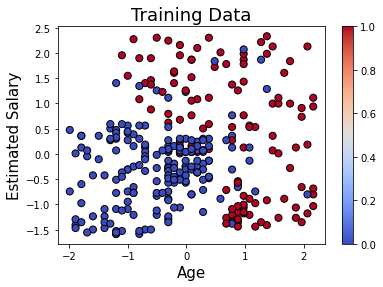

In [8]:

# Plotting the surface
x1 = X1_train[:,0]
x2 = X1_train[:,1]
# xi, yi = np.meshgrid(x1, x2)

# # Interpolate the y values on the grid.
# zi = griddata((x1, x2), y_train, (xi, yi), method='cubic')

# # Plotting the filled contour plot
# plt.figure(figsize=(8, 6))
# contour = plt.contourf(xi, yi, zi, levels=14, cmap='coolwarm')

plt.scatter(x1, x2, c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=50)
plt.colorbar()
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Estimated Salary', fontsize = 15)
plt.title("Training Data", fontsize = 18)
# Showing the plot
plt.show()

## Training the Logistic Regression model

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X1_train, y_train)

LogisticRegression(random_state=0)

## Predicting the test results - Confusion Matrix

In [18]:
y_pred1 = classifier.predict(X1_train)
print(y_pred1[0])
print(X_train[0,:], y_train[0])

0
[   44 39000] 0


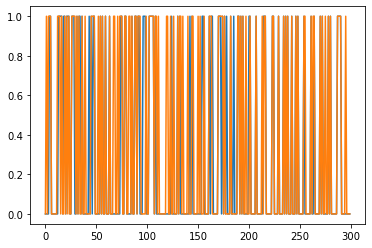

In [19]:
plt.plot(y_pred1)
plt.plot(y_train)

In [20]:
y_pred = classifier.predict(X1_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89